In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

base = importr('base')
utils = importr('utils')
evmix = importr('evmix')
stats = importr('stats')
numpy2ri.activate()

In [24]:
inputPath = r"X:\georisk\HaRIA_B_Wind\data\raw\from_bom\2019\Daily"
stnNum = 4090
fname = f"DC02D_Data_{stnNum:06d}_999999999632559.txt"
paramdf = pd.read_csv(r"X:\georisk\HaRIA_B_Wind\data\derived\obs\daily_max_wind\wind\gammagpd_iterative\004090.csv")
df = pd.read_csv(os.path.join(inputPath, fname), skipinitialspace=True)
gust = df[df['Quality of maximum gust speed']=='Y']['Speed of maximum wind gust in m/s'].dropna().values

In [25]:
def ppoints(n, a=0.375):
    if isinstance(n, int):
        m = np.arange(1, n + 1)
        if n > 10:
            a = 0.5
    else:
        m = np.arange(1, len(n) + 1)
        if len(n) > 10:
            a = 0.5
    pp = (m - a)/(m[-1] + (1 - a) - a)
    return pp

In [4]:
def calcEP(n):
    empprob = ppoints(n)
    transempprob = -1/np.log(empprob)
    minemppower = -np.log10(1 - 1/n/100)
    maxemppower = np.ceil(np.log10(np.max(transempprob))) + 1
    theprob = 1 - np.power(10, -np.arange(minemppower, maxemppower + 0.05, 0.05))
    theprob = np.sort(np.concatenate((theprob, 1 - theprob)))
    transtheprob = -1/np.log(theprob)
    ep = 1 - np.exp(-1/(transtheprob/365.25))
    return ep

In [26]:
n = len(gust)
empprob = ppoints(n)
transempprob = -1/np.log(empprob)
minemppower = -np.log10(1 - 1/n/100)
maxemppower = np.ceil(np.log10(np.max(transempprob))) + 1
theprob = 1 - np.power(10, -np.arange(minemppower, maxemppower + 0.05, 0.05))
theprob = np.sort(np.concatenate((theprob, 1 - theprob)))
transtheprob = -1/np.log(theprob)
ep = 1 - np.exp(-1/(transtheprob/365.25))

In [35]:
empep = 1 - np.exp(-1/(transempprob/365.25))

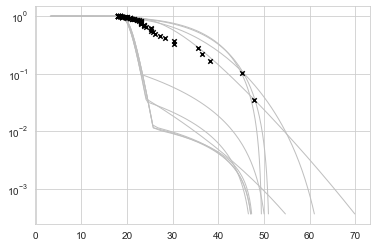

In [44]:
fig, ax = plt.subplots(1, 1)
for idx, row in paramdf.iterrows():
    thequant = evmix.qgammagpd(theprob, row.gshape, row.gscale, row.u, row.sigmau, row.xi, row.phiu)
    ax.plot(thequant, ep, color='0.75', linewidth=1)

idx = np.where(empep < 0.999)[0]
xmin = int(np.sort(gust)[idx][0] / 5) * 5
xmax = (int(gust.max() / 5) + 2) * 5
ax.scatter(np.sort(gust)[idx], empep[idx], s=20, color='k', marker='x', label='Data', zorder=100,)
ax.set_yscale('log')


In [38]:
np.where(empep < 0.99)

(array([5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049,
        5050, 5051, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5060,
        5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071,
        5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082,
        5083, 5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5093,
        5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102], dtype=int64),)